<a href="https://colab.research.google.com/github/MrBriit/NLP-Project-Sacasm-Detection/blob/main/BRIGHT_KYEREMEH_%7C_NLP_Project_%7C_Sarcasm_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**BRIGHT KYEREMEH**--NLP Project

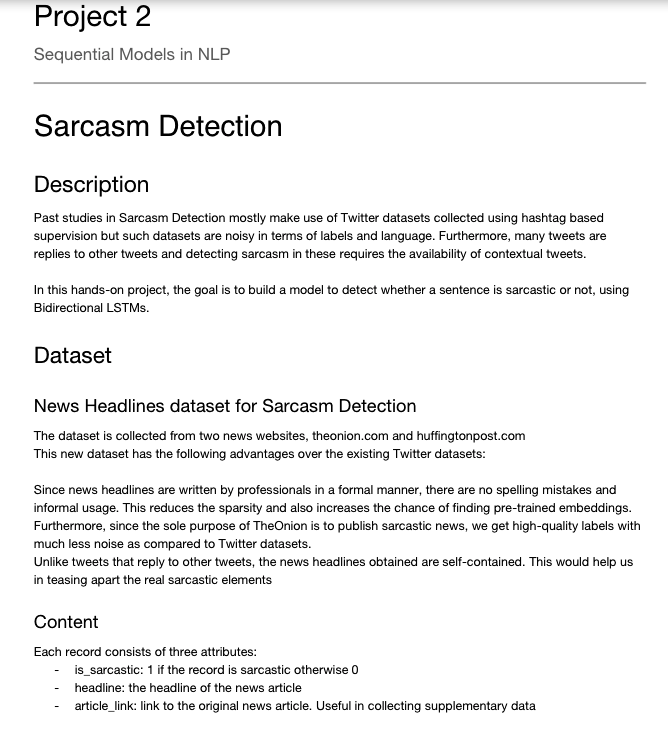

### Package Version Needed For This Project:
- tensorflow==2.2.0
- pandas==1.0.5
- numpy==1.18.5
- google==2.0.3

# **Topic:** Sarcasm Detection

### Dataset

The Daaset for this project can be found [here](https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk)





In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


STEPS: The required steps for this project are given below with the allocated marks.

### Load Data (5 Marks)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_json('/content/drive/MyDrive/k/NLP/sarcasm detection/Copy of Sarcasm_Headlines_Dataset.json',lines=True)

In [ ]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


### Drop `article_link` from dataset (5 Marks)

In [ ]:
df = df.drop(['article_link'],axis=1)

In [ ]:
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [ ]:
df['headline'].values

array(["former versace store clerk sues over secret 'black code' for minority shoppers",
       "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
       "mom starting to fear son's web series closest thing she will have to grandchild",
       ..., 'reparations and obama',
       'israeli ban targeting boycott supporters raises alarm abroad',
       'gourmet gifts for the foodie 2014'], dtype=object)

In [ ]:
df.shape

(26709, 2)

In [ ]:
df['headline'][0]

"former versace store clerk sues over secret 'black code' for minority shoppers"

In [ ]:
df.isnull().sum()

headline        0
is_sarcastic    0
dtype: int64

### Get length of each headline and add a column for that (5 Marks)

In [ ]:
df['length'] = [len(df['headline'][x]) for x in range(df.shape[0])]

In [ ]:
df[0:5]

,headline,is_sarcastic,length
0,former versace store clerk sues over secret 'b...,0,78
1,the 'roseanne' revival catches up to our thorn...,0,84
2,mom starting to fear son's web series closest ...,1,79
3,"boehner just wants wife to listen, not come up...",1,84
4,j.k. rowling wishes snape happy birthday in th...,0,64


In [ ]:
max(df['length'])

254

In [ ]:
min(df['length'])

7

In [ ]:
sum(df['length'])/len(df['length'])

60.910591935302705

### Initialize parameter values
- Set values for max_features, maxlen, & embedding_size
- max_features: Number of words to take from tokenizer(most frequent words)
- maxlen: Maximum length of each sentence to be limited to 25
- embedding_size: size of embedding vector

In [ ]:
max_features = 10000
maxlen = 20
embedding_size = 50

### Apply `tensorflow.keras` Tokenizer and get indices for words (5 Marks)
- Initialize Tokenizer object with number of words as 10000
- Fit the tokenizer object on headline column
- Convert the text to sequence


In [ ]:
import tensorflow

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = max_features,split=' ')
tokenizer.fit_on_texts(df['headline'].values)

In [ ]:
X = tokenizer.texts_to_sequences(df['headline'].values)

In [ ]:
X[0:2]

[[307, 678, 3336, 2297, 47, 381, 2575, 5, 2576, 8433],
 [3, 8434, 3337, 2745, 21, 1, 165, 8435, 415, 3111, 5, 257, 8, 1001]]

### Pad sequences (5 Marks)
- Pad each example with a maximum length
- Convert target column into numpy array

In [ ]:
X = pad_sequences(X,maxlen=maxlen)

In [ ]:
X[:2]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  307,
         678, 3336, 2297,   47,  381, 2575,    5, 2576, 8433],
       [   0,    0,    0,    0,    0,    0,    3, 8434, 3337, 2745,   21,
           1,  165, 8435,  415, 3111,    5,  257,    8, 1001]],
      dtype=int32)

In [ ]:
X.shape

(26709, 20)

In [ ]:
y = df['is_sarcastic']
y = np.array(y)

In [ ]:
y.shape

(26709,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(21367, 20)
(5342, 20)


### Vocab mapping
- There is no word for 0th index

In [ ]:
tokenizer.word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'from': 14,
 'at': 15,
 'about': 16,
 'you': 17,
 'this': 18,
 'by': 19,
 'after': 20,
 'up': 21,
 'out': 22,
 'be': 23,
 'how': 24,
 'as': 25,
 'it': 26,
 'that': 27,
 'not': 28,
 'are': 29,
 'your': 30,
 'his': 31,
 'what': 32,
 'he': 33,
 'all': 34,
 'just': 35,
 'who': 36,
 'has': 37,
 'will': 38,
 'more': 39,
 'one': 40,
 'into': 41,
 'report': 42,
 'year': 43,
 'why': 44,
 'have': 45,
 'area': 46,
 'over': 47,
 'donald': 48,
 'u': 49,
 'day': 50,
 'says': 51,
 's': 52,
 'can': 53,
 'first': 54,
 'woman': 55,
 'time': 56,
 'like': 57,
 'her': 58,
 "trump's": 59,
 'old': 60,
 'no': 61,
 'get': 62,
 'off': 63,
 'an': 64,
 'life': 65,
 'people': 66,
 'obama': 67,
 'now': 68,
 'house': 69,
 'still': 70,
 "'": 71,
 'women': 72,
 'make': 73,
 'was': 74,
 'than': 75,
 'white': 76,
 'back': 77,
 'my': 78,
 'i': 79,
 'clinton': 80,
 'down': 81,
 'i

### Set number of words
- Since the above 0th index doesn't have a word, add 1 to the length of the vocabulary

In [ ]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

29657


### Load Glove Word Embeddings (5 Marks)

In [ ]:
EMBEDDING_FILE = '/content/drive/MyDrive/k/NLP/sarcasm detection/Copy of glove.6B.50d.txt'

### Create embedding matrix

In [ ]:
embeddings = {}
f = open(EMBEDDING_FILE)
for o in f:
    word = o.split(" ")[0]
    print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    print(embd)
    embeddings[word] = embd


# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 50))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

Streaming output truncated to the last 5000 lines.
 -0.31202    0.47234    0.0071306  0.18661    0.75634   -0.51796
  0.061758  -0.031694   0.83112    0.23235    0.70315    0.54196
 -0.6668    -0.11954  ]
ryck
[-0.034252  -0.21038   -0.20516   -0.27068   -0.59503   -0.5769
  0.28408    0.99962    0.66715    0.41315    0.050682   0.42749
  0.11067   -0.32594   -0.98944   -0.70764   -0.015784  -0.78916
  0.49865   -0.024846  -0.49356   -0.49941   -0.066616  -0.4838
  0.37974    0.90286    0.047079   0.51047   -0.24364   -0.44808
 -1.2365    -0.45678    0.42557    0.28977   -0.24402   -0.27918
 -0.38026   -0.13976    0.063049   0.15806    0.27481   -0.42348
 -0.32577   -0.35646   -0.496     -0.71995    0.67355   -0.39607
 -0.0089345 -0.48975  ]
mitchellii
[-0.14809  -0.76738  -0.034383 -0.29386  -0.24101  -0.11117   1.5309
  0.080262 -0.12885   0.3563   -0.13904   0.88672   0.56946  -0.04928
 -0.095353 -0.33306   0.6609    0.77586   0.7071    0.54372  -0.39266
 -0.58361   0.71149   0.7405

In [ ]:
embedding_matrix.shape

(29657, 50)

In [ ]:
vocab_len = embedding_matrix.shape[0]

### Define model (10 Marks)
- Hint: Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, flatten it, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.

In [ ]:
from tensorflow.keras.layers import LSTM,Embedding,Flatten,Input,Dense,Bidirectional
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Embedding(input_dim = vocab_len,output_dim = embedding_size,weights = [embedding_matrix],input_length=maxlen,trainable = False))
model.add(Bidirectional(LSTM(100)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(1,activation='sigmoid'))
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 20, 50)            1482850   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 200)               120800    
_________________________________________________________________
flatten_5 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               25728     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 1,637,699
Trainable params: 154,849
Non-trainable params: 1,482,850
______________________________________

### Compile the model (5 Marks)

In [ ]:
sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9,decay=0.0001)

model.compile(optimizer=sgd,loss = "binary_crossentropy",metrics=['accuracy'])

earlystop = tensorflow.keras.callbacks.EarlyStopping(patience=5)
red = tensorflow.keras.callbacks.ReduceLROnPlateau(patience=5)

### Fit the model (5 Marks)

In [ ]:
history = model.fit(x_train,y_train,batch_size=64,epochs=80,validation_data=(x_test,y_test),callbacks=[earlystop,red])

Epoch 1/80
334/334 [==============================] - 6s 10ms/step - loss: 0.6867 - accuracy: 0.5581 - val_loss: 0.6671 - val_accuracy: 0.5872
Epoch 2/80
334/334 [==============================] - 3s 8ms/step - loss: 0.6638 - accuracy: 0.5973 - val_loss: 0.6505 - val_accuracy: 0.6168
Epoch 3/80
334/334 [==============================] - 3s 8ms/step - loss: 0.6470 - accuracy: 0.6264 - val_loss: 0.6368 - val_accuracy: 0.6391
Epoch 4/80
334/334 [==============================] - 3s 8ms/step - loss: 0.6284 - accuracy: 0.6506 - val_loss: 0.6247 - val_accuracy: 0.6514
Epoch 5/80
334/334 [==============================] - 3s 8ms/step - loss: 0.6208 - accuracy: 0.6555 - val_loss: 0.6130 - val_accuracy: 0.6619
Epoch 6/80
334/334 [==============================] - 3s 8ms/step - loss: 0.6053 - accuracy: 0.6739 - val_loss: 0.6017 - val_accuracy: 0.6726
Epoch 7/80
334/334 [==============================] - 3s 8ms/step - loss: 0.5922 - accuracy: 0.6820 - val_loss: 0.5916 - val_accuracy: 0.6816
Epoch

In [ ]:
model.evaluate(x_test,y_test)

167/167 [==============================] - 1s 3ms/step - loss: 0.3667 - accuracy: 0.8385


[0.3666975796222687, 0.838450014591217]

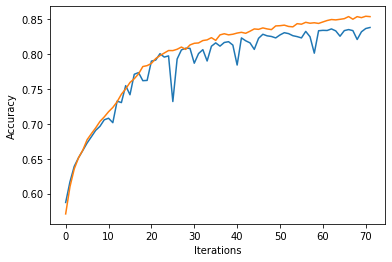

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

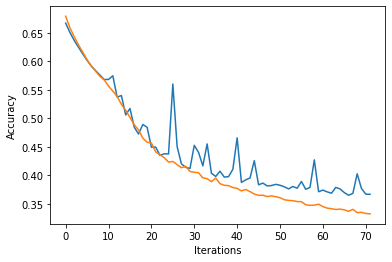

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

#**The End**